# Дослідження пошарових розподілів хімічних елементів за товщиною нанорозмірних плівкових композицій методом мас-спектрометрії вторинних нейтральних часток

**Мета роботи**: навчитися проводити перерахунок первинних результатів мас- спектрометричних досліджень нанорозмірних плівкових композицій в прямі концентраційні профілі та роботи висновки щодо перерозподілу хімічних елементів з товщиною плівок в результаті їх термічної обробки.

In [1]:
import glob

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Хід виконання роботи

Послідовність шарів досліджуваної плівкової композиції повідомляється викладачем (також уточнюються конкретні ізотопи, які визначалися в ході дослідів), також повідомляються режими термічної обробки даної плівкової композиції. Відповідні записи робляться в протоколі роботи. Заповнюються табл. 1.1. і табл. 1.2. Надаються вихідні дані у вигляді залежності інтенсивності виходу вторинних нейтральних часток елементів досліджуваних плівкових композицій від тривалості іонного травлення.

### Вихідні дані

Досліджувана плівкова композиція: $Pt(15 nm)/Fe(15 nm)$

Табл. 1.1. Параметри досліджуваної плівкової композиції експерименту

|       | Матеріал | Еталон | Досліджуваний ізотоп | Природний вміст досліджуваного ізотопу | Товщина шару |
|-------|----------|--------|----------------------|----------------------------------------|--------------|
| Шар 1 |    $Pt$  |    +   |  ${}^{195} Pt$       |                33.832  %               |    15 nm     |
| Шар 2 |    $Fe$  |    -   |  ${}^{56} Fe$        |                91.754  %               |    15 nm     |


Табл. 1.2. Параметри термічної обробки плівкових композицій

|         | Температура відпалу | Тривалість відпалу |
|---------|---------------------|--------------------|
| Режим 1 |         -           |        -           |
| Режим 2 |      330 K          |     60 хв          |
| Режим 3 |      330 K          |     24 год         |
| Режим 4 |      330 K          |     62 год         |

               

In [2]:
materials = ['Pt', 'Fe']
natural_abund = np.array([33.832, 91.754]) / 100
thickness = np.array([15, 15])  # nm

Для елементів шарів, які не були прийняті за еталонні, використовуючи рівняння (1.12), розрахувати коефіцієнти, які характеризують в скільки разів у вихідному шарі даного елементу атомів більше чи менше в порівнянні з вихідним шаром елементу, прийнятого за еталон. Результати розрахунків занести в табл. 1.3.

$$ n_{\text{ел-ту}} = \frac{\frac{\rho_{\text{еталону}} h_{\text{еталону}}}{M_{\text{еталону}}}}{\frac{\rho_{\text{ел-ту}} h_{\text{ел-ту}}}{M_{\text{ел-ту}}}} $$

In [3]:
rho = np.array([7.87, 21.45])  # g/cm^3
molar_mass = np.array([55.93, 194.96])  # g/mol
n = (rho[0] * thickness[0] / molar_mass[0]) / \
    (rho[1] * thickness[1] / molar_mass[1])
print('n = %.2f' % n) 

n = 1.28


Табл. 1.3. Параметри і результати розрахунку коефіцієнтів за ф-лою (1.12)

|                               |  |
|-------------------------------|--|
| **Еталон Pt**                   |  |
| Густина елементу еталону      | 21.45 g/cm³ |
| Молярна маса елементу еталону | 194.964766 g/mol  |
| **Елемент Fe**                |  |
| Густина елементу 1            | 7.874 g/cm³ |
| Молярна маса елементу 1       | 55.9349393 g/mol |
| nел-ту 1                      | 1.28 |

Побудувати вихідні залежності інтенсивності сигналу вторинних нейтральних часток від тривалості іонного травлення плівкових композицій після різних режимів термічної обробки. Вставити за зазначені графічні залежності в табл. 1.4.

### Зчитування даних

In [4]:
files = sorted(glob.glob('data/SMNS/*.csv'))
threshold = {'Fe': 250, 'Pt': 70, 'Al2O3': 100}
ht_conditions = [(pd.read_csv(file, sep='\t', index_col=0) - threshold).clip_lower(0) for file in files]
titles = [f'Режим {i}' for i in range(1, 5)]
print("Read files:")
for file in files:
    print(f'\t{file}')

Read files:
	data/SMNS/PtFeAl2O3_0.csv
	data/SMNS/PtFeAl2O3_T330_1_t60min.csv
	data/SMNS/PtFeAl2O3_T330_2_24hours.csv
	data/SMNS/PtFeAl2O3_T330_3_62hours.csv


### Побудова графіків інтенсивностей

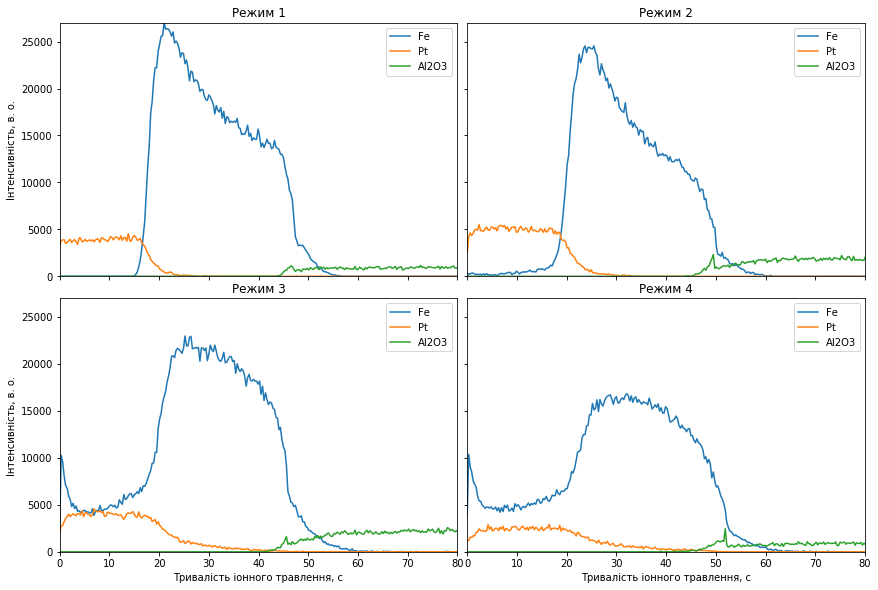

In [59]:
f, ax = plt.subplots(2, 2, squeeze=False, figsize=(12, 8), sharey=True, sharex=True)
for i, ht_condition in enumerate(ht_conditions):
    ht_condition.plot(ax=ax.flatten()[i], title=titles[i])
    ax.flatten()[i].set_xlabel('Тривалість іонного травлення, с')
    ax.flatten()[i].set_ylabel('Інтенсивність, в. о.')
    ax.flatten()[i].set_xlim(0, 80)
    ax.flatten()[i].set_ylim(0, 27000)
plt.tight_layout(0)
plt.savefig('./report/images/intenses.pdf')

### Визначення загальної та експериментальної інтенсивностей

Визначити експериментальну загальну інтенсивність сигналу (𝐼заг. експ.) вторинних нейтральних часток кожного елементу досліджуваної плівкової композиції після різних режимів термічної обробки. Результати занести в табл. 1.5.

In [6]:
I_experimental = pd.DataFrame([ht_condition[materials].apply(np.trapz, axis=0) 
                               for ht_condition in ht_conditions], index=titles)
I_experimental

,Pt,Fe
Режим 1,244950.0,1843770.0
Режим 2,355365.0,1658380.0
Режим 3,315810.0,2111300.0
Режим 4,226215.0,1818350.0


Визначити загальну інтенсивність сигналу вторинних нейтральних часток кожного елементу досліджуваної плівкової композиції після різних режимів термічної обробки, користуючись рівнянням (1.15). Результати занести в табл. 1.5.

In [25]:
I_general = I_experimental / natural_abund
dct = {'Експериментальна': I_experimental, 'Загальна': I_general}
I = pd.concat(dct.values() ,axis=1, keys=dct.keys())
I.round(0)

Експериментальна              Загальна           
                      Pt         Fe         Pt         Fe
Режим 1         244950.0  1843770.0   724019.0  2009471.0
Режим 2         355365.0  1658380.0  1050381.0  1807420.0
Режим 3         315810.0  2111300.0   933465.0  2301044.0
Режим 4         226215.0  1818350.0   668642.0  1981766.0

In [54]:
plt.gray()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

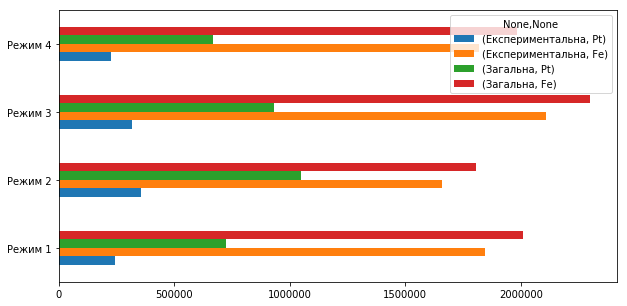

In [56]:
plt.gray()
I.plot.barh(figsize=(10, 5))

In [29]:
print(I.round(0).to_latex())

\begin{tabular}{lrrrr}
\toprule
{} & \multicolumn{2}{l}{Експериментальна} & \multicolumn{2}{l}{Загальна} \\
{} &               Pt &         Fe &         Pt &         Fe \\
\midrule
Режим 1 &         244950.0 &  1843770.0 &   724019.0 &  2009471.0 \\
Режим 2 &         355365.0 &  1658380.0 &  1050381.0 &  1807420.0 \\
Режим 3 &         315810.0 &  2111300.0 &   933465.0 &  2301044.0 \\
Режим 4 &         226215.0 &  1818350.0 &   668642.0 &  1981766.0 \\
\bottomrule
\end{tabular}



 ### Визначення факторів чутливості

Визначити фактор чутливості кожного елементу досліджуваної плівкової композиції після різних режимів термічної обробки, користуючись рівнянням (1.18). Результати занести в табл. 1.6.

In [8]:
D = I['Загальна', 'Pt'] / I['Загальна', 'Fe'] / n
D = pd.DataFrame({'Fe': D, 'Pt': np.full(4, 1), 'Al2O3': np.full(4, 1)}, index=D.index)
D

,Al2O3,Fe,Pt
Режим 1,1,0.281721,1
Режим 2,1,0.454402,1
Режим 3,1,0.317194,1
Режим 4,1,0.263811,1


### Побудова залежності концентрації від тривалості іонного травлення

Використовуючи рівняння (1.1), перерахувати первинні залежності «Інтенсивність – Тривалість іонного травлення» в прямі концентраційні профілі в координатах «Концентрація – Тривалість іонного травлення» плівкових композицій після різних режимів термічної обробки. Побудовані графічні залежності концентрації елементів від глибини плівкової композиції вставити в табл. 1.7.

In [9]:
ht_conditions_C = list()
for d, ht_condition in zip(D.iterrows(), ht_conditions):
    I_D_sum = (ht_condition[['Fe', 'Pt', 'Al2O3']].multiply(d[1])).sum(axis=1)
    df = (ht_condition[['Fe', 'Pt', 'Al2O3']] * d[1]).divide(I_D_sum, axis=0)
    ht_conditions_C.append(df[['Fe', 'Pt', 'Al2O3']])

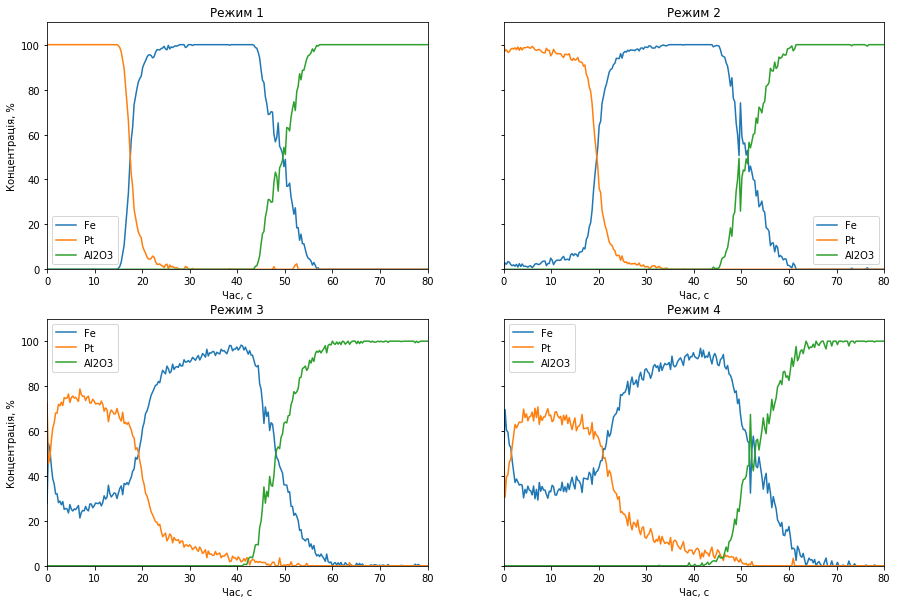

In [10]:
f, ax = plt.subplots(2, 2, squeeze=False, figsize=(15, 10), sharey=True)
for i, ht_condition in enumerate(ht_conditions_C):
    (ht_condition * 100).plot(ax=ax.flatten()[i], title=titles[i])
    ax.flatten()[i].set_xlabel('Час, с')
    ax.flatten()[i].set_ylabel('Концентрація, %')
    ax.flatten()[i].set_xlim(0, 80)
    ax.flatten()[i].set_ylim(0, 110)

## Висновки

1. В результаті осадження спостерігаються чіткі шари Pt та Fe.
2. Після відпалу за температури $330 {}^oС$ протягом 60 хв спостерігається дифузія Fe в шар Pt.
3. Після відпалу протягом 24 годин за тієї ж температури відбувається подальша дифузія Fe в шар Pt. Відбувається формування фази FePt.
4. Після подальшого відпалу до 64 годин відбувається гомогенізація першого шару (Pt).